**PRIMERA TASCA. ALGORÍSMIA I PROGRAMACIÓ AUDIOVISUAL**

NEREA GONZÁLEZ ANGUITA
Anàlisi fitxer de so

Exercici 1


In [ ]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import soundfile as sf

!sudo apt-get install libportaudio2
!pip install sounddevice

!pip install pysoundfile
!pip install bitstring

import sounddevice as sd
import IPython
import os

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


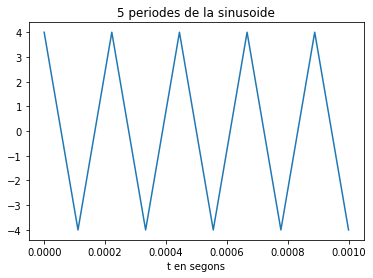

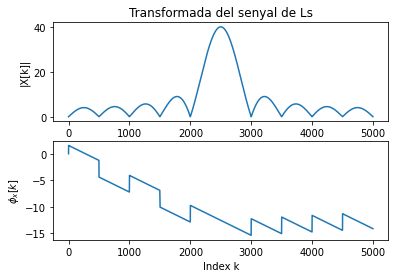

In [ ]:
from numpy.fft import fft # importem la funció fft

T= 2.5 # Durada de T segons
fm=9000 # freqüència de mostratge en Hz
fx=fm/2 # freqüència de la sinusoide
A=4 # amplitud de la sinusoide
pi=np.pi # valor del número pi
L = int(fm * T) # Nombre de mostres del senyal digital
Tm=1/fm # període de mostratge
t=Tm*np.arange(L) # Vector amb els valors de la variable temporal, de 0 T
x = A * np.cos(2 * pi * fx * t) # senyal sinusoidal
cami=os.getcwd()+'\\so_exemple1.wav' # nom del fitxer a escriure en el path

Np=5
Tx=1/fx # Període del senyal
Ls=int(fm*Np*Tx) # Nombre de mostres corresponents a 5 períodes de lasinusoide
plt.figure(0) # nova figura
plt.plot(t[0:Ls], x[0:Ls]) # Representació del senyal en funció del temps
plt.xlabel("t en segons") # etiqueta eix temporal
plt.title("5 periodes de la sinusoide") # títol del gràfic

#sd.play(x/A,fm) #dividirem per l'amplitud per tal d'evitar saturacions
plt.show() # visualització de l’objecte gràfic

#TRANSFORMADA


N=5000 # Dimensió de la transformada discreta
X=fft(x[0:Ls],N)

k=np.arange(N) # vector amb els valors 0 ≤ 𝑘𝑘 < 𝑁𝑁

if (max(x) > 1):
  x = x / max(x)

sf.write('so_exemple1.wav', x, fm)

plt.figure(1) # nova figura
plt.subplot(211) # espai per representar el mòdul
plt.plot(k,abs(X)) # representació del mòdul de la transformada
plt.title('Transformada del senyal de Ls')
# etiqueta del títol
plt.ylabel('|X[k]|') # etiqueta de mòdul
plt.subplot(212) # espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X))) # representació de la fase de latransformad, desenroscada
plt.xlabel('Index k') # etiqueta de l’eix d’abscisses
plt.ylabel('$\phi_x[k]$') # etiqueta de la fase en Latex
plt.show()



Si fx és fm/2 observem 5 periòdes d'una funció que tendeix a una ona triangular. Això és degut al fenòmen de mostreig : fòrmula de Nyquist, on la frecuència de mostreig ha de ser major o igual a el doble que la frecuència màxima del senyal. En aquest cas tenim que: 9000 > = 2* ( 9000 / 2) ; 9000 > = 9000 , observem un funció triangular perque estem al límit d'aquest criteri.  

In [ ]:
# El senyal es pot escoltar (reproduir) directament des de python important un entorn de treball
# amb els dispositius de so, com per exemple sounddevice o IPython:

# sd.play(x) # reproducció d’àudio
IPython.display.Audio('so_exemple1.wav')

Exercici 2


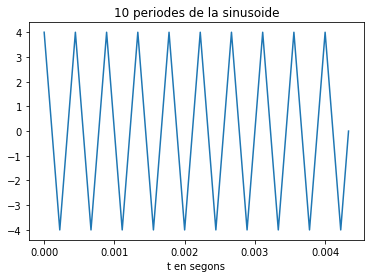

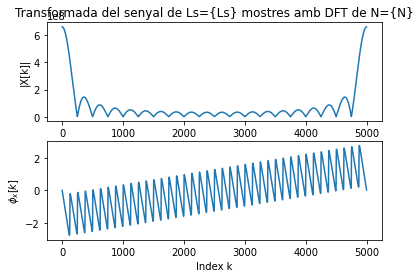

<Figure size 432x288 with 0 Axes>

In [ ]:
from numpy.fft import fft 
fm=9000 # freqüència de mostratge en Hz
fx=fm/4 #freqüència de la sinusoide

pi=np.pi 
Tm=1/fm # període de mostratge
t=Tm*np.arange(L) # Vector amb els valors de la variable temporal, de 0 a T
x = A * np.cos(2 * pi * fx * t) # senyal sinusoidal
Tx=1/fx # Període del senyal

Np=10
Ls=int(fm*Np*Tx) # Nombre de mostres corresponents a 10 períodes de la sinusoide
plt.figure(0) # nova figura
plt.plot(t[0:Ls], x[0:Ls]) # Representació del senyal en funció del temps
plt.xlabel("t en segons") # etiqueta eix temporal
plt.title("10 periodes de la sinusoide") # títol del gràfic
plt.show() # visualització de l’objecte gràfic


#TRANSFORMADA 

x_rectificat=abs(X)
N=5000 # Dimensió de la transformada discreta
X=fft(x_rectificat[0:Ls],N)

k=np.arange(N) # vector amb els valors 0 ≤ 𝑘𝑘 < 𝑁𝑁

plt.figure(1) # nova figura
plt.subplot(211) # espai per representar el mòdul
plt.plot(k,x_rectificat) # representació del mòdul de la transformada
plt.title('Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')


plt.ylabel('|X[k]|') # etiqueta de mòdul
plt.subplot(212) # espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X))) # representació de la fase de latransformad, desenroscada
plt.xlabel('Index k') # etiqueta de l’eix d’abscisses
plt.ylabel('$\phi_x[k]$') # etiqueta de la fase en Latex
plt.figure(2)
plt.show()


In [ ]:
# sd.play(x/A, fm) # reproducció d’àudio
x_rectificat = abs(x)

if (max(x_rectificat) > 1):
  x_rectificat = x_rectificat / max(x_rectificat)

sf.write('so_exemple3.wav', x_rectificat, fm)
IPython.display.Audio('so_exemple3.wav')

En la transformada observem dos grans lòbuls en la tranformada, dels qual el primer s'hauria de trobar en --> k= fx/fm * N = 2250/9000*5000= 1250

Exercici 3


[0.99996948 0.17364502 0.93966675 ... 0.5        0.93966675 0.17364502]
9000


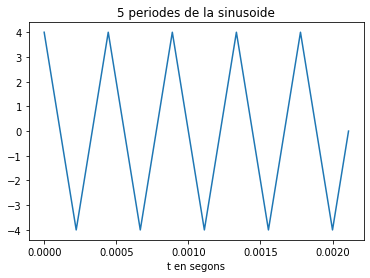

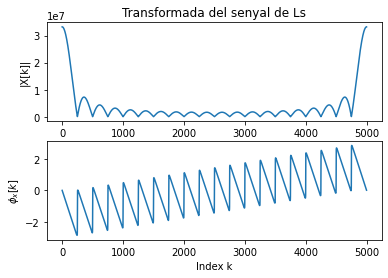

In [ ]:

T= 2.5 # Durada de T segons

x_rectificat, fm=sf.read('so_exemple3.wav')
print(x_rectificat)
print(fm)

fm=9000  # freqüència de mostratge en Hz
fx=fm/4 # freqüència de la sinusoide
A=4 # amplitud de la sinusoide
pi=np.pi # valor del número pi
L = int(fm * T) # Nombre de mostres del senyal digital
Tm=1/fm # període de mostratge
t=Tm*np.arange(L) # Vector amb els valors de la variable temporal, de 0 a T
x = A * np.cos(2 * pi * fx * t) # senyal sinusoidal

Tx=1/fx # Període del senyal
Np=5
Ls=int(fm*Np*Tx) # Nombre de mostres corresponents a 5 períodes de lasinusoide
plt.figure(0) # nova figura
plt.plot(t[0:Ls], x[0:Ls]) # Representació del senyal en funció del temps
plt.xlabel("t en segons") # etiqueta eix temporal
plt.title("5 periodes de la sinusoide") # títol del gràfic
plt.show() # visualització de l’objecte gràfic

#TRANSFORMADA

from numpy.fft import fft # importem la funció fft
k=np.arange(N) # vector amb els valors 0 ≤ 𝑘𝑘 < 𝑁𝑁
x_rectificat=abs(X)

N=5000 # Dimensió de la transformada discreta
X=fft(x_rectificat[0:Ls],N)

plt.figure(1) # nova figura
plt.subplot(211) # espai per representar el mòdul
plt.plot(k,x_rectificat) # representació del mòdul de la transformada
plt.title('Transformada del senyal de Ls')
# etiqueta del títol
plt.ylabel('|X[k]|') # etiqueta de mòdul
plt.subplot(212) # espai per representar la fase
plt.plot(k,np.unwrap(np.angle(X))) # representació de la fase de latransformad, desenroscada
plt.xlabel('Index k') # etiqueta de l’eix d’abscisses
plt.ylabel('$\phi_x[k]$') # etiqueta de la fase en Latex
plt.show()

#Recuperem l'arxiu creat anteriorment i representem els 5 períodes del senyal. 


Exercici 4

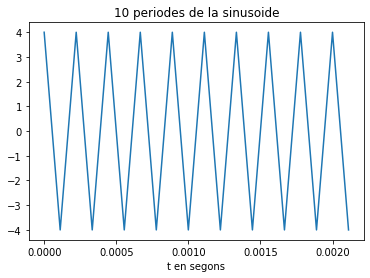

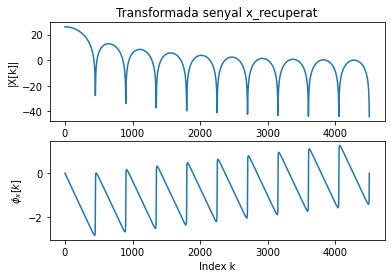

<Figure size 432x288 with 0 Axes>

In [ ]:
from logging import log
from numpy.fft import fft # importem la funció fft

Tx=1/fx # Període del senyal
Np=10
Ls=int(fm*Np*Tx) # Nombre de mostres corresponents a 5 períodes de lasinusoide
plt.figure(0) # nova figura
plt.plot(t[0:Ls], x[0:Ls]) # Representació del senyal en funció del temps
plt.xlabel("t en segons") # etiqueta eix temporal
plt.title("10 periodes de la sinusoide") # títol del gràfic
plt.show() # visualització de l’objecte gràfic

#TRANSFORMADA EN DB

N=5000 # Dimensió de la transformada discreta (fm/2)
X=fft(x_rectificat[0:Ls],N)

k = np.arange((N//2)+1) # vector amb els valors 0 ≤ 𝑘 ≤ 𝑁/2
fk = (k/N)*fm 

logaritme=np.log10(abs(X)/max(x_rectificat))
x_db=20*logaritme

phase = np.unwrap(np.angle(X))

plt.figure(1) # nova figura
plt.subplot(211) # espai per representar el mòdul
plt.plot(fk[k],x_db[k]) # representació del mòdul de la transformada
plt.title('Transformada senyal x_recuperat')
# etiqueta del títol
plt.ylabel('|X[k]|') # etiqueta de mòdul
plt.subplot(212) # espai per representar la fase
plt.plot(fk[k],phase[k]) # representació de la fase de la transformada, desenroscada
plt.xlabel('Index k') # etiqueta de l’eix d’abscisses
plt.ylabel('$\phi_x[k]$') # etiqueta de la fase en Latex
plt.figure(2)
plt.show()

Observem els 10 periodes i el lòbul primari i els secundaris en la transformada en dB del senyal. 

exercici 5


44100
9387119


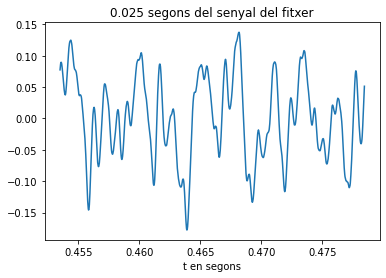

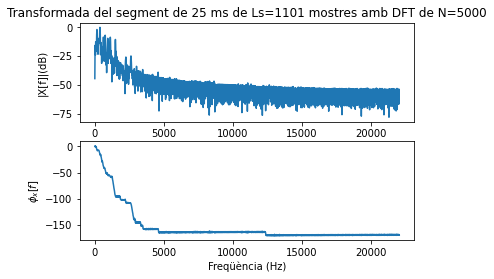

In [ ]:
import wave
from numpy.fft import fft # importem la funció fft
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from numpy.fft import fft #permet format de vectors de matlab
import os
import pandas as pd
#abrir archivo 
x, fm = sf.read('Alan_Walker.wav')
print(fm) # freqüència de mostratge en Hz
print(len(x))

Tm = 1/fm # Periode de mostreig
t = Tm * np.arange(len(x)) # Vector amb els valors de la variable temporal, de 0 a T
L = int(25e-3*fm) # Tamany de la finestra
n = 20000 # Mostra inicial
s = x[n:n+L-1]

plt.figure(11) # nova figura
plt.plot(t[n:n+L-1], s) # Representació del senyal en funció del temps
plt.xlabel("t en segons") # etiqueta eix temporal
plt.title("0.025 segons del senyal del fitxer") # títol del gràfic
plt.show() # visualització de l’objecte gràfic.

if (max(s) > 1):
  s = s / max(s)

sf.write('25ms_walker.wav', s, fm) 
IPython.display.Audio('25ms_walker.wav')

N = 5000 # Dimensió de la transformada discreta
X = fft(s, N) # Càlcul de la transformada del segment de 25 ms
XdB = 20*np.log10(abs(X)/max(abs(X)))
phase = np.unwrap(np.angle(X))
Ls = len(s)
# I podem representar el mòdul i la fase, en funció de la posició de cada valor amb:

k = np.arange((N//2)+1) # vector amb els valors 0 ≤ 𝑘 < 𝑁/2
fk = (k/N)*fm

plt.figure(12) # nova figura
plt.subplot(211) # espai per representar el mòdul
plt.plot(fk[k],XdB[k]) # representació del mòdul de la transformada
plt.title(f'Transformada del segment de 25 ms de Ls={Ls} mostres amb DFT de N={N}') # etiqueta del títol
plt.ylabel('|X[f]|(dB)') # etiqueta de mòdul
plt.subplot(212) # espai per representar la fase
plt.plot(fk[k],phase[k]) # representació de la fase de la transformada, desenroscada
plt.xlabel('Freqüència (Hz)') # etiqueta de l’eix d’abscisses
plt.ylabel('$\phi_x[f]$') 
plt.show() 
plt.show()

In [ ]:
IPython.display.Audio('Alan_Walker.wav')

Observem un espectre amb molt de soroll. Com que el mostreig de la cançó és de 44100 Hz, l'espectre de la transformada arribarà fins a 22050Hz (la meitat).Les freqüències importants del segment triat son les que van de 0 a 5000, ja que després disminueixen molt els valors.  